# MODS205 - Digital Finance - Project

### Leonardo Hannas de Carvalho Santos
### Vinícius Barros Alvarenga

---
## Question 1
**Comment on the article “Crypto’s Richest Rebel” from Fortune April/May 2022 available on the e-campus website using all keywords and concepts covered in the course.**

---
## Question 2
**Comment on the article “Binance CEO Changpeng Zhao charged with money laundering” from Fortune Website 2023-11-23 available on the e-campus website using all keywords and concepts covered in the course.**

---
## Question 3

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Question 3.1
**Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.**

In [96]:
# Data for the 2 stocks
air_liquide_stock = pd.read_csv('AI.PA.csv')
peugeot_stock = pd.read_csv('UG.PA.csv')

# Data for the CAC40 index
CAC40 = pd.read_csv('^FCHI.csv')

# Data for 5-week interest rate from the US Treasury
interest_rate = pd.read_csv('^IRX.csv')

# List of the dataframes
df_list = [air_liquide_stock, peugeot_stock, CAC40, interest_rate]

In [97]:
# Function to replace the null (nan) values of the datavrframes with the mean of the column
def replace_nan_with_mean(df_list):
    updated_dfs = []
    for df in df_list:
        for col in df.columns:
            if df[col].isnull().any():
                df[col].fillna(df[col].mean(), inplace=True)
        updated_dfs.append(df)
    return updated_dfs

updated_list = replace_nan_with_mean(df_list)

In [98]:
# Check if the dataframes had null values and have been updated
if updated_list == df_list:
    print("The dataframes didn't have null values")
else:
    print("The dataframes had null values and have been updated")

The dataframes didn't have null values


In [99]:
# Dimensions of the dataframes
print(f"Air liquid stock shape = {air_liquide_stock.shape}")
print(f"Peugeot stock shape = {peugeot_stock.shape}")
print(f"CAC40 shape = {CAC40.shape}")
print(f"Interest rate shape = {interest_rate.shape}")

Air liquid stock shape = (255, 7)
Peugeot stock shape = (255, 7)
CAC40 shape = (255, 7)
Interest rate shape = (252, 7)


In [100]:
# Function to convert the date column from string to datetime
def str_to_date(column_name, df_list):
    for df in df_list:
        df[column_name] = pd.to_datetime(df[column_name])
    return df_list

In [101]:
# Function to align the dataframes
def align_dataframes(df_list):
    # Create a set with all the dates present in all the dataframes
    dates = set.intersection(*(set(df['Date']) for df in df_list))

    # Criates a new list of dataframes, where each dataframe is filtered to contain only the dates present in all dataframes
    list_aligned_dfs = [df[df['Date'].isin(dates)].sort_values('Date').reset_index(drop=True) for df in df_list]

    # Verifies if all the dates are present in all the dataframes
    for data in dates:
        if not all(data in df['Date'].values for df in list_aligned_dfs):
            # If a date is not present in all dataframes, remove that date from all dataframes
            list_aligned_dfs = [df[df['Date'] != data] for df in list_aligned_dfs]

    return list_aligned_dfs

In [102]:
# Update the list of dataframes
updated_list = align_dataframes(str_to_date("Date",updated_list))
df_list = updated_list

# Update the dataframes
air_liquide_stock = df_list[0]
peugeot_stock = df_list[1]
CAC40 = df_list[2]
interest_rate = df_list[3]

### Question 3.2
**Give a short financial analysis of the two stocks by using relevant concepts of the course.**

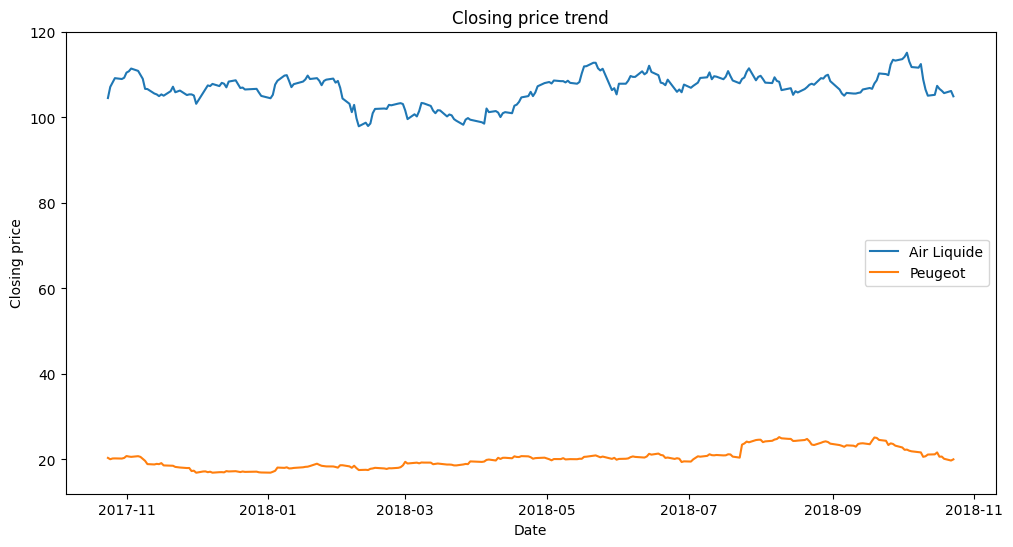

In [103]:
# Closing price trend
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(air_liquide_stock['Date'], air_liquide_stock['Close'], label='Air Liquide')
plt.plot(peugeot_stock['Date'], peugeot_stock['Close'], label='Peugeot')
plt.title('Closing price trend')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [104]:
# Daily return trend
air_liquide_stock['Daily Return'] = air_liquide_stock['Close'].pct_change()
peugeot_stock['Daily Return'] = peugeot_stock['Close'].pct_change()
CAC40['Daily Return'] = CAC40['Close'].pct_change()

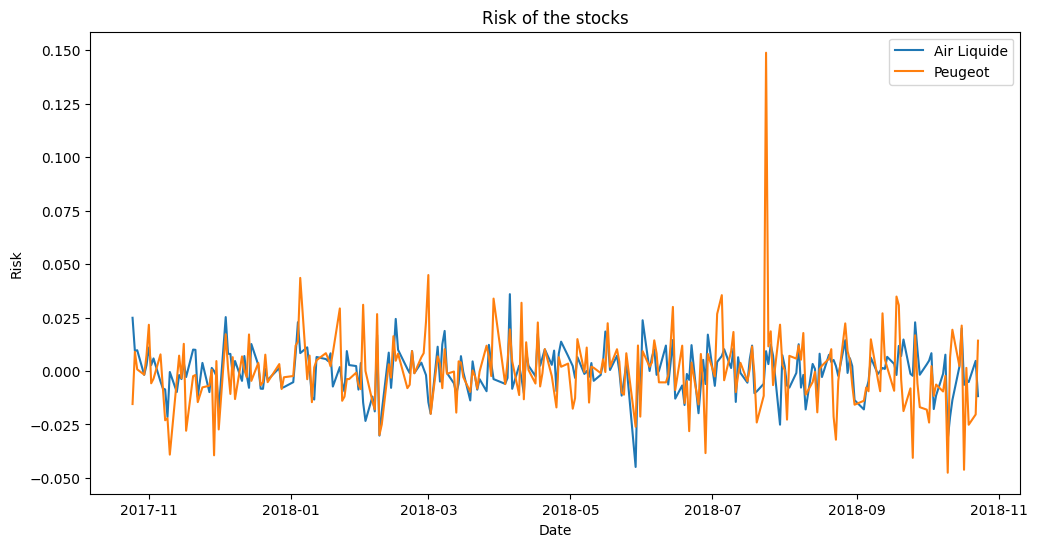

In [105]:
# Risk of the stocks by the standard deviation of the daily returns
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(air_liquide_stock['Date'], air_liquide_stock['Daily Return'], label='Air Liquide')
plt.plot(peugeot_stock['Date'], peugeot_stock['Daily Return'], label='Peugeot')
plt.title('Risk of the stocks')
plt.xlabel('Date')
plt.ylabel('Risk')
plt.legend()
plt.show()

### Question 3.3
**Compute the return for both stocks and for the CAC40 index. Comment on your results.**

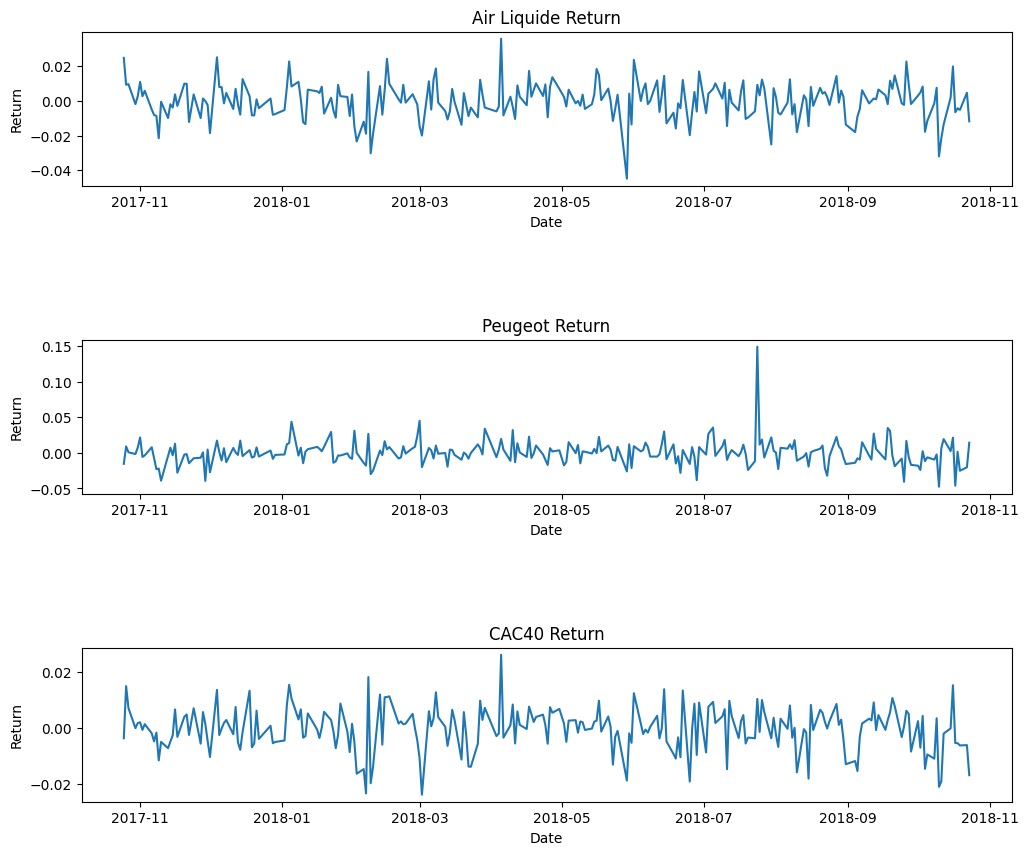

In [111]:
# We computed the returns in the question 3.2

def plot_return(ax, x_axis_data, y_axis_data ,title):
    out = ax.plot(x_axis_data, y_axis_data, label=title)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    return out

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=1)
plot_return(ax1, air_liquide_stock['Date'], air_liquide_stock['Daily Return'], 'Air Liquide Return')
plot_return(ax2, peugeot_stock['Date'], peugeot_stock['Daily Return'], 'Peugeot Return')
plot_return(ax3, CAC40['Date'], CAC40['Daily Return'], 'CAC40 Return')
    


### Question 3.4
**Compute the coefficients of Kurtosis and of asymmetry of the 3 series of `Question 3.3`. Plot the histograms and comment on your results.**

## Question 3.5
**Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant?**

## Question 3.6
**Compute the correlation between each stock and the CAC40. Comment on your results.**

## Question 3.7
**Compute the returns of a portfolio in which both stocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results.**

## Question 3.8
**Consider a portfolio with one stock and the risk-free interest rate (you can choose the stock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and $A=1.5$?**

## Question 3.9
**Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component; portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of `Question 3.7`. These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio are inefficient?**

## Question 3.10
**Consider the portfolio of `Question 3.7`. Compute the Sharpe ratio, the Sortino ratio, the Sterling ratio. Why are there differences between these ratios?**

## Question 3.11
**Compute the empirical VAR at $1\%$ for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.**

## Question 3.12
**Compute the VAR using resampling with 1000 observations. Compute the $1\%$ VAR on the simulated data set. Comment on your results.**

---
## Question 4

**Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, …) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market?**